###**Hands-on Session 3** (UKACM Autumn School) ###


1. **Statistical Finite Element Method**
*   Forward modelling of a mass-spring system
*   Introducing data to the problem

2. **Inverse problems**
*   Inferring the spring stiffness
*   Inferring the Young's modulus of a truss bridge

To get started, please click 'File' --> select 'Save a copy in drive'.






In [ ]:
#@title Import python packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np
from scipy.stats import norm
import warnings
csmlColor = {'red': '#c40000',
             'blue': '#006efe',
             'black':'#000000',
             'yellow': '#cece00',
             'darkBlue': "#004989",
             }
warnings.filterwarnings("ignore", category=RuntimeWarning)

np.random.seed(5)

**Probability density function (PDF)**
A Probability Density Function (PDF) shows how likely it is for a continuous random variable to take certain values. It tells us where the values of a variable are most concentrated or spread out.


$$ p(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\frac{(x-\bar{x})}{\sigma}^2}. \tag{1}$$
Here, $\bar{x}$ is the mean value and $\sigma$  is the standard deviation. They both can be obtained by using the expectation function $\mathbf{E}$

$$\bar{x} = \mathbf{E}[x], \tag{2}$$
$$\sigma = \sqrt{\mathbf{E}[(x-\bar{x})^2]}. \tag{3}$$

In [ ]:
#@title PDF
def pdf(x, mu, sigma):
    return np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2) / np.sqrt(2 * np.pi * sigma ** 2)

###Forward Modelling

From an engineering view, we define any unknown parameter as random variable. Consider a simple spring-mass system in equilibrium.

<figure>
<center>
<img src='https://raw.githubusercontent.com/fcirak/ukacm_autumn_school_2024/main/jupyter/figs/sdof_example.png' width=600/>
</figure>

$$ ku = f, \tag{4}$$
where $k$ is the stiffness, $f$ is the applied force, and $u$ is the displacement under equilibrium. Let $k$ be an unkown value where we can define as a random variable with a normal distribution. The notation for a normal distribution with mean $\bar{k}$ and standard deviation $\sigma_k$ is written as:

$$k \sim \mathcal{N}\left( \bar{k}, \sigma_k^2 \right). \tag{5}$$

This expression means that we are uncertain about $k$ but we still have  prior on how its distribution.

The distribution $k$ influences the distribution of the displacement. We can push this distribution to $u$ and we can obtain

$$u \sim \mathcal{N}\left( \bar{u}, \sigma_u^2 \right), \tag{6}$$

where $\bar{u}$, $\sigma_x$ are the mean and the standard deviation for the displacement $u$. The mean can directly be computed as

$$\bar{u} =  f/\bar{k}. \tag{7} $$

For the pushed standard deviation, we need to address to the taylor series expansion. We can do a first-order series expansion of the random variable around the expected value (mean):

$$u =  \bar{u} + \frac{\partial \bar{u}}{\partial k}(k-\bar{k}). \tag{8}$$

By plugging equation (7) to (8), we obtain

$$u =  \bar{u} + \left(-\frac{f}{ \bar{k}^2}(k-\bar{k})\right). \tag{9}$$

Now, we can obtain the standard deviation using equation (3)

$$\sigma_u = \sqrt{\mathbf{E}[(u-\bar{u})^2]} = \sqrt{\frac{f}{ \bar{k}^2}\mathbf{E}[(k-\bar{k})^2]\frac{f}{ \bar{k}^2}} = \sqrt{\frac{f}{ \bar{k}^2}\sigma_k^2\frac{f}{ \bar{k}^2}}= \frac{f}{ \bar{k}^2}\sigma_k . \tag{10}$$

Now we have both mean and standard deviation. Therefore, we can plot the distribution. With the given parameters below, plot the distributions for $k$ and $u$.

###Plot the distributions###

Text(0, 0.5, '$p(k)$')

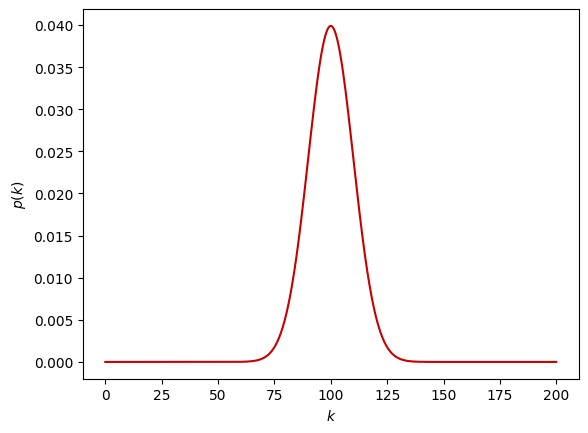

In [ ]:
kbar = 100.
sigma_k = 10.
f = 100

plt.plot(np.linspace(0, 200, 1000), pdf(np.linspace(0, 200, 1000), kbar, sigma_k),color= csmlColor["red"])
plt.xlabel(r"$k$")
plt.ylabel(r"$p(k)$")

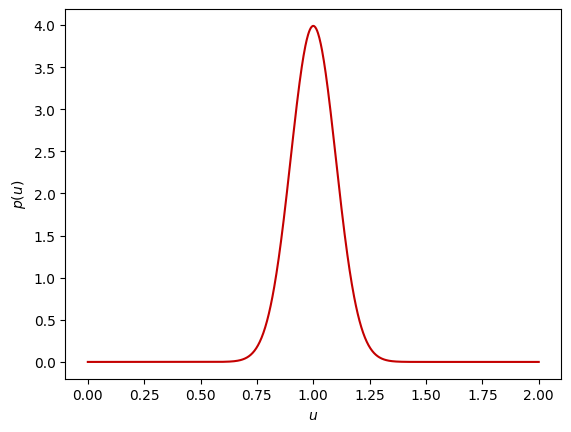

In [ ]:
uu = np.linspace(0, 2, 1000) # u values for plotting

u_bar = f/kbar
sigma_u = (f/(kbar**2))*sigma_k

plt.plot(uu, pdf(uu, u_bar, sigma_u),color= csmlColor["red"])
plt.xlabel(fr"$u$")
plt.ylabel(fr"$p(u)$")
plt.show()

We successfully propagated the stiffness uncertainty to the displacements.  We can use this distribution of the displacement $u$ as our prior
$$p(u) = \mathcal{N}\left(\bar{u}, \sigma_u^2 \right). \tag{11}$$

Now, we can introduce some experimental data $y$ in order to enhance our solution.
$$y=u_r+\epsilon, \tag{12}$$
where $\epsilon \sim \mathcal{N}\left(0, \sigma_{\epsilon}^2 \right)$ is the Gaussian measurement noise. The measurement of the displacemet $y$ is our likelihood
$$p(y|u). \tag{13}$$

Then, we can "enhance" our solution $u$ by computing the posterior. This allows us to include the knowledge obtained from the experiment.



Posterior Mean: 1.3048780487804879
Posterior Std: 0.062469504755442426


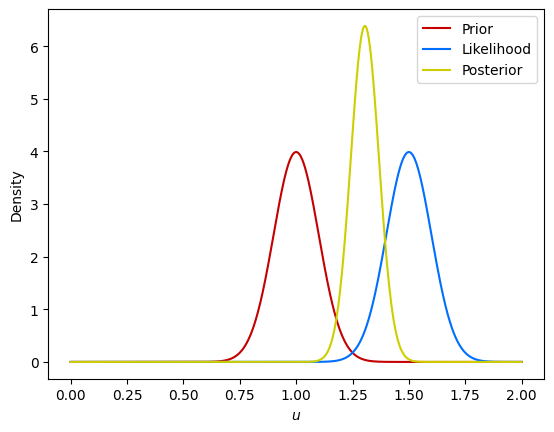

In [ ]:
y= 1.5
sigma_eps = 0.08

def compute_posterior(mean0,std0,mean1,std1):
  # Compute posterior variance
  posterior_variance = 1 / (1 / std0**2 + 1 / std1**2)
  # Compute posterior mean
  posterior_mean = (mean0 / std0**2  + mean1 / std1**2 ) * posterior_variance
  # Output the results
  posterior_std = np.sqrt(posterior_variance)  # Get standard deviation from variance
  return posterior_mean, posterior_std

posterior_mean, posterior_std = compute_posterior(u_bar,sigma_u,y,sigma_eps)
print(f"Posterior Mean: {posterior_mean}")
print(f"Posterior Std: {posterior_std}")

uu = np.linspace(0, 2, 1000) # u values for plotting
plt.plot(uu, pdf(uu, u_bar, sigma_u),color= csmlColor["red"],label="Prior")
plt.plot(uu, pdf(uu, y, sigma_u),color= csmlColor["blue"],label="Likelihood")
plt.plot(uu, pdf(uu, posterior_mean, posterior_std),color= csmlColor["yellow"],label="Posterior")
plt.legend()
plt.xlabel(fr"$u$")
plt.ylabel("Density")
plt.show()

One can apply this forward modelling approach for different uncertainties (force, displacement etc.) and higher dimensional problems. Further details can be found in https://www.sciencedirect.com/science/article/pii/S0045782520307180.

###Inverse Problem

The inverse problems are used to find an estimate of the parameters of a model that reflect observed data.

From an engineering view, we define any unknown parameter as random variable. Consider a simple spring-mass system in equilibrium.

autumn_1dof.svg

$$ ku = f, \tag{14}$$
where $k$ is the stiffness, $f$ is the applied force, and $u$ is the displacement under equilibrium. Let $k$ be an unkown value where we can define as a random variable with a normal distribution. The notation for a normal distribution with mean $\bar{k}$ and standard deviation $\sigma_k$ is written as:

$$k \sim \mathcal{N}\left( \bar{k}, \sigma_k^2 \right). \tag{15}$$

This expression means that we are uncertain about $k$ but we still have  prior on how its distribution.

Let's assume that we build an experiment set-up where we can measure the displacement of the spring.  If the stiffness $k$ is the only unknown, one can estimate $k$ after observing the displacement $y$

$$y = u + \epsilon, \tag{16}$$

where $\epsilon$ is a Gaussian $\mathcal{N}(0,\sigma^2_{\epsilon})$, the measurement error of our set-up. For the uknown $k$, we have a prior belief that $k$ has a Gaussian distribution with a probability density

$$p(k). \tag{17}$$



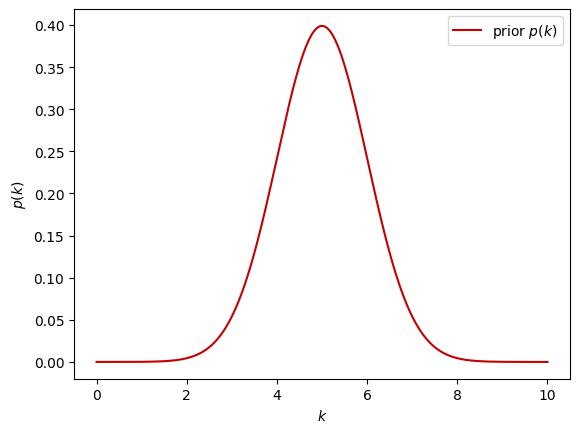

In [ ]:
#@title Plot the prior distribution
xx = np.linspace(0, 10, 1000) # stiffness values for plotting

mu0 = 5.0
sigma0 = 1.0

plt.plot(xx, pdf(xx, mu0, sigma0), label=fr'prior $p(k)$',color= csmlColor["red"])
plt.xlabel(fr"$k$")
plt.ylabel(fr"$p(k)$")
plt.legend()

In this spring-mass example, we can use the measurements $y$ to estimate the stiffness. Using the knowledge of $y$, we can estimate how likely it is to measure it for any $k$. It is written as the likelihood of observing $y$ for a given $k$
$$p(y | k), \tag{18}$$
which is given as

$$p(y | k) = \frac{1}{\sigma_{\epsilon}\sqrt{2 \pi}} \exp \left({- \frac{(y-f/k)^2}{2\sigma^2_{\epsilon}}}\right). \tag{19}$$


$k$ =  4.788708996409064


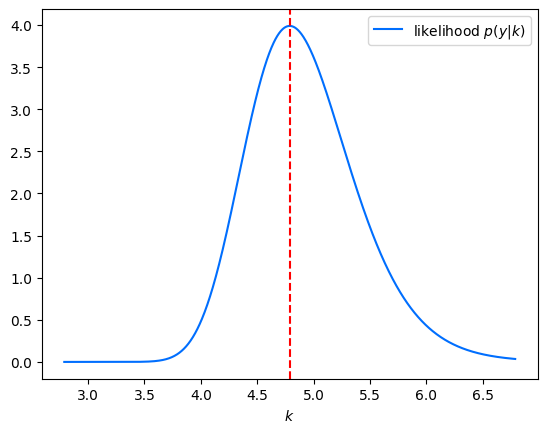

In [ ]:
np.random.seed(5)
k_star = 5. #unknown stiffness we want to infer

sigma_eps = 0.1 # standard deviation of the observation error

f = 5  # applied force
y = f/k_star + np.random.normal(0,sigma_eps) #measured displacement
k_obs = f/y #estimated stiffness

k_values = np.linspace(k_obs-f*4*sigma_eps, k_obs+f*4*sigma_eps, 1000) # stiffness values for plotting


print(fr"$k$ = ",k_obs)
plt.plot(k_values, pdf(f/k_values, y, sigma_eps), label=fr'likelihood $p(y|k)$',color= csmlColor["blue"])
plt.axvline(x=k_obs, color='r', linestyle='--')
plt.xlabel(fr"$k$")
plt.legend()
plt.show()

###MCMC sampling for the posterior###
The posterior combines both the prior and the likelihood to update your belief about the parameter after observing the data. By applying the Bayes' Theorem

$$p(k | y) = \frac{p(y | k) p(k)}{p(y)}, \tag{20}$$

where it is not always easy to compute $p(y)$ directly. Therefore, we will estimate the posterior through sampling.

In [ ]:
#@title MCMC using MH
# Metropolis-Hastings MCMC
def metropolis_hastings(data, initial_theta, num_samples, proposal_width):
    # Prior (e.g., Normal prior)
    def prior(theta,mu = mu0,sigma=sigma0):
        return pdf(theta,mu,sigma)

    # Likelihood function
    def likelihood(theta, data,sigma=sigma_eps):
        return pdf(theta,data,sigma)

    # Unnormalısed posterior (proportional to prior * likelihood)
    def un_posterior(theta, data):
        return prior(theta) * likelihood(f/theta, data)

    samples = [initial_theta]
    current_theta = initial_theta

    for _ in range(num_samples):
        # Propose a new theta from the proposal distribution (Gaussian centered at current_theta)
        proposed_theta = np.random.normal(current_theta, proposal_width)

        # Acceptance probability
        acceptance_ratio = un_posterior(proposed_theta, data) / (un_posterior(current_theta, data))

        # Accept or reject the proposed sample
        if np.random.rand() < acceptance_ratio:
            current_theta = proposed_theta

        samples.append(current_theta)

    return np.array(samples)


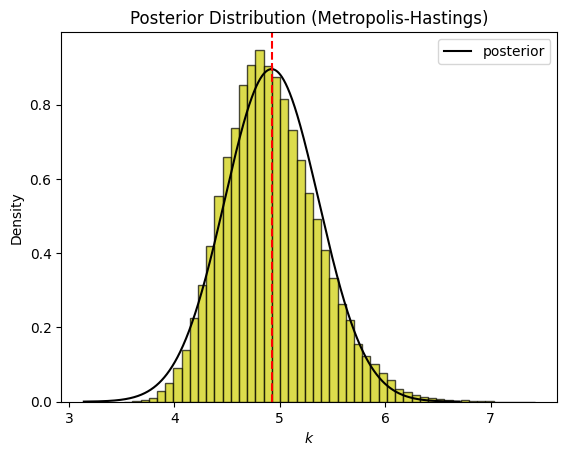

In [ ]:
np.random.seed(5)
# Example data
data = np.array([y])  # Observation

# Run MCMC
num_samples = 100000
proposal_width = 0.5
initial_theta = 0.001 # Initial guess

samples = metropolis_hastings(data, initial_theta, num_samples, proposal_width)

# Burn-in and thinning
burn_in = 500  # Ignore the first 500 samples (burn-in)
samples = samples[burn_in:]

post_mean = np.mean(samples)
post_std = np.std(samples)

post = np.linspace(post_mean-(4*post_std), post_mean + (4*post_std), 1000)
# Plot the posterior distribution

plt.hist(samples, bins=50, density=True, alpha=0.7, color= csmlColor["yellow"],edgecolor=csmlColor['black'])
plt.plot(post, pdf(post, post_mean, post_std),color= csmlColor["black"],label=fr'posterior')
plt.axvline(x=post_mean, color='r', linestyle='--')
plt.title('Posterior Distribution (Metropolis-Hastings)')
plt.xlabel(fr'$k$')
plt.ylabel('Density')
plt.legend()
plt.show()

###MAP Estimate###
Maximising the product of likelihood and prior with respect to the unknown $k$ in order to infer $k^*$:

$$ k_{MAP} =  \arg\max_{k} ( \log p(y | k) + \log p(k)), \tag{21}$$



**log prior**
$$\log p(k) = -\log(\sigma_{k})-\frac{\log{2\pi}}{2}{- \frac{(k-\bar{k})^2}{2\sigma^2_k}}, \tag{22}$$

**log likelihood**
$$\log p(y | k) = -\log(\sigma_{\epsilon})-\frac{\log{2\pi}}{2}- \frac{(f/k-y)^2}{2\sigma^2_{\epsilon}}. \tag{23}$$

In [ ]:
def map_est_1D(obs):
  def map_1D(theta):
    return -norm.logpdf(theta, loc=obs, scale=sigma_eps)  -norm.logpdf(theta, loc=mu0,  scale=sigma0 )
  return map_1D


res = minimize(map_est_1D(k_obs), [1],
               bounds=((1e-6, None),),
               method='SLSQP') #Sequential Least Squares

print(res.x)

[4.79080098]


In [ ]:
#@title FEM functions
def gen_connectivity(nodes):
    connectivity = []
    for i in range(len(nodes)):
        for j in range(i+1, len(nodes)):
            distance = np.sqrt((nodes[i][0]-nodes[j][0])**2+(nodes[i][1]-nodes[j][1])**2)
            if distance <= 2:
                connectivity.append([i, j])
    return np.asarray(connectivity)

def plot_truss(coord,connect,restricted_coords, load_node, loadx,loady, arrow = True,randombar = None ):
  # Create the plot
  fig, ax = plt.subplots()

  # Plot the nodes
  ax.scatter(coord[:, 0], coord[:, 1], color='black', zorder=5)

  ax.scatter(coord[restricted_coords, 0], coord[restricted_coords, 1], color='red', zorder=10, label='BC')

  load_direction = np.array([loadx/np.sqrt(loadx**2+loady**2),loady/np.sqrt(loadx**2+loady**2)])  # Load direction (downward)
  if arrow == True:
    ax.annotate('', xy=coord[load_node] + load_direction * 0.5, xytext=coord[load_node],arrowprops=dict(facecolor='black', shrink=0.05, lw=2))

  # Plot the edges (truss members)
  for connection in connect:
      x_values = [coord[connection[0], 0], coord[connection[1], 0]]
      y_values = [coord[connection[0], 1], coord[connection[1], 1]]
      ax.plot(x_values, y_values, 'b-', lw=3, zorder=1)
  if randombar != None:
      x_values = [coord[connect[randombar][0], 0], coord[connect[randombar][1], 0]]
      y_values = [coord[connect[randombar][0], 1], coord[connect[randombar][1], 1]]
      ax.plot(x_values, y_values, lw=3, zorder=1,c='green')
  # Annotate the nodes
  for i, (x, y) in enumerate(coord):
      ax.text(x, y, f'{i}', fontsize=12, ha='right')

  # Set the aspect ratio and labels
  ax.set_aspect('equal')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_title('Truss System')
  ax.set_ylim(np.min(coord[:,1]-1),np.max(coord[:,1])*1.3)
  plt.grid(True)
  plt.legend()
  plt.show()
def plot_truss_obs(coord,connect,y):
  # Create the plot
  fig, ax = plt.subplots()

  # Plot the nodes
  ax.scatter(y[:, 0], y[:, 1], color=csmlColor["red"], zorder=5,label = "Observations")




  # Plot the edges (truss members)
  for connection in connect:
      x_values = [coord[connection[0], 0], coord[connection[1], 0]]
      y_values = [coord[connection[0], 1], coord[connection[1], 1]]
      ax.plot(x_values, y_values, color=csmlColor["black"], ls ="--", lw=1, zorder=1)
  # Annotate the nodes
  for i, (x, y) in enumerate(coord):
      ax.text(x, y, f'{i}', fontsize=12, ha='right')

  # Set the aspect ratio and labels
  ax.set_aspect('equal')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_title('Truss System')
  plt.grid(True)
  plt.legend()
  plt.show()
#%% Finite element functions
def km_e(dx,dy,E,A,L):

    # Direction cosines
    cx = dx/L
    cy = dy/L


    # Axial stiffness array
    ax_stiff = E * A/L

    # Element stiffness matrices
    km = np.array([[cx**2, cx*cy, -cx**2, -cx*cy],
                   [cx*cy, cy**2, -cx*cy, -cy**2],
                   [-cx**2, -cx*cy, cx**2, cx*cy],
                   [-cx*cy, -cy**2, cx*cy, cy**2]])*ax_stiff
    return km

def km_g(km,n1,n2):
    # Global stiffness matrix assembly
    K = np.zeros((n, n))
    for h in range(numel):
        LM = np.array([2*n1[h], 2*n1[h]+1, 2*n2[h], 2*n2[h]+1], dtype=int)
        for i in range(4):
            for j in range(4):
                K[LM[i], LM[j]] += km[i,j,h]

    return K

def fem_solver(coord, connect, E, load_node, fx,fy, restricted_nodes):

    #%% Load and BC

    bc_loc =  np.array([coord[restricted_nodes[0]],coord[restricted_nodes[1]]])

    load_loc = np.array([coord[load_node]])


    ptnode = []

    for i in range(load_loc.shape[0]):
        ptnode.append((np.where(np.all(coord ==load_loc[i], axis=1))[0][0]).astype(int))

    ptnode = np.asarray(ptnode)


    bindex = []
    for i in bc_loc:
        bindex.append(np.where(np.all(coord ==i, axis=1))[0][0])

    bcnodes = np.array(np.repeat(bindex, 2))

    dirn =    np.array(np.tile([0,1],len(bindex)))
    disp =    np.array(np.repeat([0,0],len(bindex)))




    n1 = connect.T[0]
    n2 = connect.T[1]

    numnp = coord.shape[0]        # total number of nodes
    numel = connect.shape[0]      # total number of elements
    n = 2 * numnp                 # total number of dof's



    # Read material and area data




    # Read element data
    matset = np.zeros((numel),dtype=int)

    A = 1*np.ones((numel,))


    # Convert single entry into np array
    if ptnode.size == 1:
        ptnode = np.array([ptnode])
        fx = np.array([fx])
        fy = np.array([fy])

    # Generate load vector
    R = np.zeros((n,1))
    for c in range(ptnode.size):
        R[np.array([2*ptnode[c], 2*ptnode[c]+1])] = [[[fx[c]]], [[fy[c]]]]




    disp_vec = np.zeros((n))


    x =  coord.T[0]
    y = coord.T[1]
    # Form local coordinate arrays
    x1 = x[n1]
    y1 = y[n1]
    x2 = x[n2]
    y2 = y[n2]
    # Lengths of truss elements
    dx = x2-x1
    dy = y2-y1
    L = np.sqrt(dx**2 + dy**2)
    km = km_e(dx,dy,E,A,L)
    K = km_g(km,n1,n2)

    #%% Solve FEM
    # Modify load vector to apply Dirichlet BC's
    for i in range(bcnodes.size):
        R -= K[:,2*bcnodes[i]+dirn[i]][:,None] * disp[i]

    # Make an array of active dof numbers
    adof = np.delete(np.array(range(2*numnp)), np.array([2*bcnodes+dirn], dtype=int)).flatten()
    Kinv = np.linalg.inv(K[np.ix_(adof,adof)])
    u = Kinv@R[np.ix_(adof)]
    disp_vec = np.zeros((n))
    disp_vec[adof] = u.flatten()
    disp_vec[2*bcnodes+dirn] = disp

    xdef = coord.T[0] + disp_vec[np.array(range(0,2*numnp-1,2))]
    ydef = coord.T[1] + disp_vec[np.array(range(1,2*numnp,2))]
    coorddef = np.concatenate([xdef.reshape(-1,1),ydef.reshape(-1,1)],axis=1)
    return coorddef

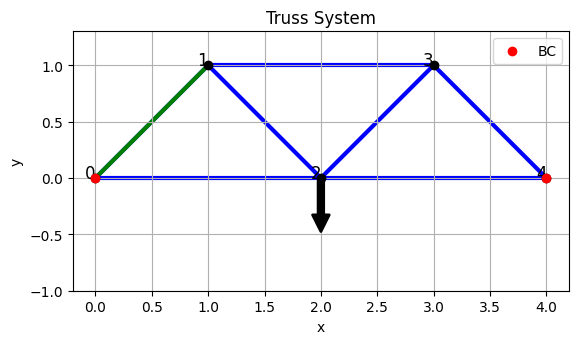

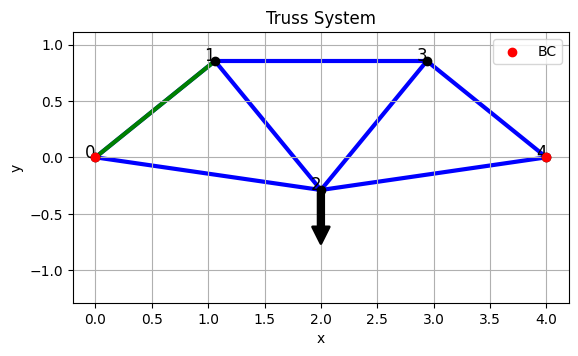

In [ ]:
#@title Truss system inverse problem

coord = np.asarray([[0.0,0.0],
                    [1.0,1.0],
                    [2.0,0.0],
                    [3.0,1.0],
                    [4.0,0.0]]) #Node coordinates

n = 2 * coord.shape[0]    #Total number of degrees of freedom

connect = gen_connectivity(coord) #Truss connectivity
numel = connect.shape[0]  # Number of trusses

restricted_nodes = [0, -1] #Nodes that are fixed
load_node = 2 #Node that is loaded
fx = np.array((0.)) #Load x
fy = np.array((-6)) #Load y
E = 100*np.ones(numel,) #Elastic modulus

coorddef = fem_solver(coord, connect, E, load_node, fx,fy, restricted_nodes)

randombar = 0 #Index for the unknown bar

plot_truss(coord,connect,restricted_nodes, load_node,fx,fy,randombar =
randombar )

plot_truss(coorddef,connect,restricted_nodes, load_node,fx,fy,randombar = randombar )

In this problem, let's assume that we don't know the Young's modulus of the green bar. Without seeing any data, we can have a prior belief on the Young's modulus of the green bar $E_1 \sim \mathcal{N}(\mu_E, \sigma^2_E)$ where the PDF is
$$p(E_1) = \frac{1}{\sigma_E\sqrt{2 \pi}} \exp \left({- \frac{(E_1-\mu_E)^2}{2\sigma^2_E}}\right). \tag{24}$$


Text(0, 0.5, '$p(E_1)$')

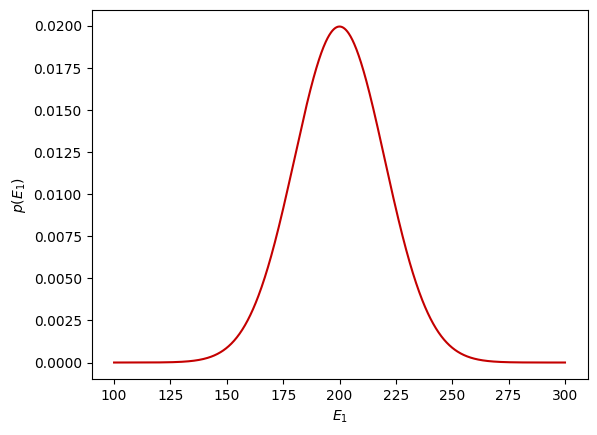

In [ ]:
xx = np.linspace(100, 300, 1000) # stiffness values for plotting

mu0 = 200
sigma0 = 20

plt.plot(xx, pdf(xx, mu0, sigma0), label=fr'prior $p(E_1)$',color= csmlColor["red"])
plt.xlabel(fr"$E_1$")
plt.ylabel(fr"$p(E_1)$")

###Observations###
In the following code, we collect noisy observations for each node where the noise is $\epsilon \sim \mathcal{N}\left( 0, \sigma^2_\epsilon\right)$. You can change "sigma_eps" to see how your observations can differ.

In [ ]:
def gen_observation(sigma_eps,randombar,E_rand):
    #sigma_eps : observation standard deviation
    #randombar : index of the random bar
    #E_rand : any value for Young's modulus
    restricted_nodes = [0, -1]
    load_node = 2
    fx = np.array((0.))
    fy = np.array((-6))
    E = 100*np.ones(numel,)
    E[randombar] = E_rand
    coorddef = fem_solver(coord, connect, E, load_node, fx,fy, restricted_nodes)
    coorddef_obs = coorddef.copy()
    coorddef_obs[1:-1]= coorddef[1:-1] + np.random.normal(0,sigma_eps,coorddef.shape)[1:-1]
    return coorddef_obs

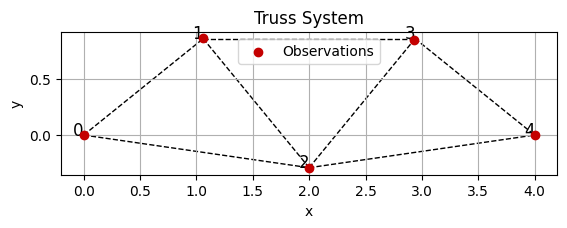

In [ ]:
#@title Observation
sigma_eps = 0.005 #standard deviation of the observation error

randombar_index = 0
y_obs = gen_observation(sigma_eps,randombar_index,100)
plot_truss_obs(coorddef,connect,y_obs)

###Get the MAP Estimate###
The red points are the observations. For this example, we use the following likelihood function

$$p(\mathbf{y} | E_1) = \frac{1}{\sigma_{\epsilon}\sqrt{2 \pi}} \exp \left({- \frac{(\mathbf{y}-\mathbf{u}(E_1))(\mathbf{y}-\mathbf{u}(E_1))^\intercal}{2\sigma^2_{\epsilon}}}\right). \tag{25}$$

Recall that we can to the MAP estimate by maximising the product of likelihood and prior with respect to the unknown $E_1$ in order to infer $E^*_1$:

$$ E_{1,MAP} =  \arg\max_{E_1} ( \log p(\mathbf{y} | E_1) + \log p(E_1)). \tag{26} $$


The log form is adventageous for numerical applicability.

**log prior**
$$\log p(E_1) = -\log(\sigma_{E})-\frac{\log{2\pi}}{2}{- \frac{(E_1-\mu_E)^2}{2\sigma^2_E}}, \tag{27}$$

**log likelihood**
$$\log p(\mathbf{y} | E_1) = -\log(\sigma_{\epsilon})-\frac{\log{2\pi}}{2}- \frac{(\mathbf{y}-\mathbf{u}(E_1))(\mathbf{y}-\mathbf{u}(E_1))^\intercal}{2\sigma^2_{\epsilon}}. \tag{28}$$

In [ ]:
mean_prior = 200
sigma_prior = 20

def nll_fn(coorddef_obs):
    def nll_naive(theta):
        E = 100*np.ones(numel,)
        E[randombar] = theta[0]
        coorddef_output = fem_solver(coord, connect, E, load_node, fx,fy, restricted_nodes)  # Solve for coorddef_output using theta

        diff = coorddef_obs.flatten() - coorddef_output.flatten()

        return ((diff.T @ diff) / (2 * sigma_eps**2)) + np.log(np.sqrt(2 * np.pi)) + np.log(sigma_eps) -norm.logpdf(theta, loc=mean_prior, scale=sigma_prior )

    return nll_naive


res = minimize(nll_fn(y_obs), [200],
               bounds=((1e-6, None),),
               method='SLSQP')

print(res.x)

[104.76839892]


###Plotter function###

In [ ]:
def pr_lh_plotter(obser,H,m_prior,s_prior):
  num_values = 201
  E_values = np.linspace(30,500,num_values)
  llh = np.zeros(num_values,)
  lprior = np.zeros(num_values,)

  for i in range(num_values):
    E = 100*np.ones(numel,)
    E[randombar] = E_values[i]
    coorddef_output = fem_solver(coord, connect, E, load_node, fx,fy, restricted_nodes)
    llh[i] = -(obser.flatten() -(H@coorddef_output).flatten()).T@(obser.flatten() -(H@coorddef_output).flatten())/(2*sigma_eps**2) -np.log(np.sqrt(2*np.pi)) -np.log(sigma_eps)
    lprior[i] = norm.logpdf(E_values[i], loc=m_prior, scale=s_prior)
  plt.plot(E_values,lprior,color = csmlColor["red"],label = fr'$\log(pr)$ $p(E_1)$')
  plt.plot(E_values,llh,color = csmlColor["blue"],label = fr'$\log(lh)$ $p(\mathbf{{y}} | E_1)$')
  plt.plot(E_values,llh+lprior,color = csmlColor["yellow"], label = r'$\log(pr)+\log(lh)$')
  plt.axvline(x= E_values[np.argmax(llh+lprior)],ls = "--")
  plt.xlabel(fr'$E_1$')
  plt.legend()
  plt.show()

###Log prior, log likelihood visualisation###
Here, we can compare how our confidence on prior and the experimental error affect the MAP estimate.

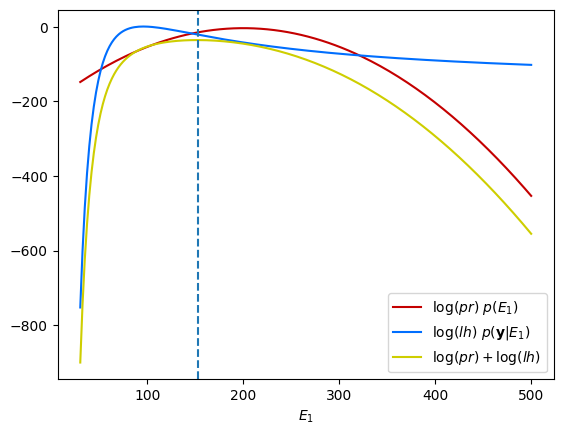

In [ ]:
E_true = 100
sigma_eps = 0.005 #standard deviation of the observation error "Try for 0.0005, 0.005,0.05"
mean_prior = 200
sigma_prior = 10

randombar_index = 0
coorddef_obs = gen_observation(sigma_eps,randombar_index,E_true)
H = np.eye(coord.shape[0])
pr_lh_plotter(y_obs,H,mean_prior,sigma_prior)

###Partial observation###

In the previous example, we assumed that we can measure all the node displacements. In real world, the experimental limitations can reduce the amount of information from the experiment. Let's assume that we have only on displacement-meter which is attached to the top left node.

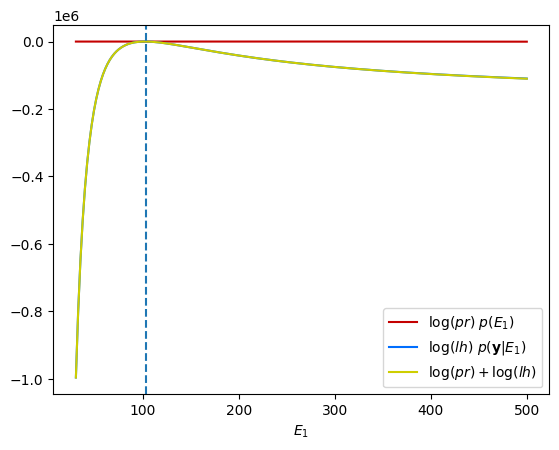

In [ ]:
coorddef_obs = gen_observation(sigma_eps,0,100)
H = np.array([[0, 0, 0, 1, 0],
              ])
y_obs = H@coorddef_obs

E_true = 100
sigma_eps = 0.005 #standard deviation of the observation error
mean_prior = 200
sigma_prior = 10

randombar_index = 0
coorddef_obs = gen_observation(sigma_eps,randombar_index,E_true)

pr_lh_plotter(y_obs,H,mean_prior,sigma_prior)